In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#set up working directory
import io
%cd '/Users/rajeshprabhakarkaila/Desktop/Datasets'

/Users/rajeshprabhakarkaila/Desktop/Datasets


In [3]:
carsales=pd.read_csv("Car details v3 copy.csv")

In [4]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
carsales.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
# Dependent Variable - selling_price
# Research Objective - Build a model that predicts price of a car when data is input

In [7]:
carsales.max_power.head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [8]:
# pandas replace() - first pattern to be replaced and second replacement
carsales.mileage=carsales.mileage.str.replace(" kmpl","")

In [9]:
carsales.engine=carsales.engine.str.replace("CC","")

In [10]:
carsales.max_power=carsales.max_power.str.replace("bhp","")

In [11]:
carsales.mileage=carsales.mileage.str.replace("km/kg","")

In [12]:
carsales.mileage=carsales.mileage.astype(float)

In [13]:
pd.set_option("display.max_rows",322)
carsales.max_power.value_counts()

max_power
74          377
81.80       220
88.5        204
67          165
46.3        162
67.1        151
88.7        148
67.04       145
70          141
62.1        141
47.3        141
88.73       132
120         131
81.86       131
140         128
68          127
73.9        124
88.76       124
55.2        121
98.6        118
67.05       117
190         110
75          108
82          108
63          100
81.83        97
37           92
100          90
100.6        87
78.9         85
102          84
90           82
69           77
126.2        75
68.05        74
85.8         71
88.8         70
74.02        66
177          65
126.32       65
53.3         64
84           63
73.97        61
83.8         58
108.5        57
138.1        55
86.8         51
98.96        49
103.6        48
117.3        47
108.45       46
147.94       45
80           45
83.1         45
121.3        44
103.5        43
62           43
71           43
110          41
73           38
99           38
214.56       3

In [14]:
carsales['companyname']=carsales.name.str.split().str[0]

In [15]:
carsales.companyname.value_counts(dropna=False)

companyname
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [16]:
carsales['torq']=carsales.torque.str.extract('(\d+(rpm))')[0]

In [17]:
carsales.torq=carsales.torq.str.replace('rpm',"")

In [18]:
carsales.torq.head()

0    2000
1    2500
2     NaN
3    2750
4     NaN
Name: torq, dtype: object

In [19]:
carsales.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'companyname', 'torq'],
      dtype='object')

In [20]:
carsales.engine=pd.to_numeric(carsales.engine,errors="coerce")
# pd.to_numeric() - brute force conversion
# errors = coerce  wherever number is not understood, impute with NA or missingvalue

In [21]:
carsales.max_power=pd.to_numeric(carsales.max_power,errors="coerce")

In [22]:
carsales.torq=pd.to_numeric(carsales.torq,errors="coerce")

In [23]:
carsales[['mileage', 'engine', 'max_power','seats','torq']].describe()

,mileage,engine,max_power,seats,torq
count,7907.000000,7907.000000,7912.000000,7907.000000,7332.000000
mean,19.418783,1458.625016,91.517919,5.416719,3072.693126
std,4.037145,503.916303,35.822499,0.959588,919.097085
min,0.000000,624.000000,0.000000,2.000000,500.000000
25%,16.780000,1197.000000,68.050000,5.000000,2250.000000
50%,19.300000,1248.000000,82.000000,5.000000,3000.000000
75%,22.320000,1582.000000,102.000000,5.000000,4000.000000
max,42.000000,3604.000000,400.000000,14.000000,5300.000000


In [24]:
import seaborn as sns

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<Axes: >

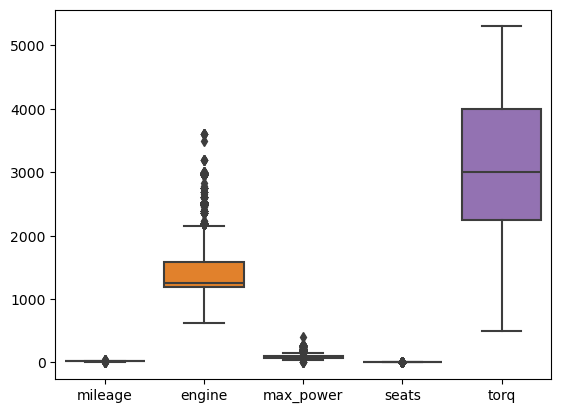

In [25]:
sns.boxplot(carsales[['mileage', 'engine', 'max_power','seats','torq']])

In [26]:
# Median Imputation of Missing Values
for col in ['mileage', 'engine', 'max_power','seats','torq']:
    carsales[col]=carsales[col].fillna(carsales[col].median())

In [27]:
# Create new variable "Age" based on purchase year as of year 2022
carsales['age']=2022-carsales.year

In [28]:
carsales.age.describe()

count    8128.000000
mean        8.195989
std         4.044249
min         2.000000
25%         5.000000
50%         7.000000
75%        11.000000
max        39.000000
Name: age, dtype: float64

In [29]:
carsales.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'companyname', 'torq', 'age'],
      dtype='object')

In [30]:
carsales=carsales.drop(['name', 'year','torque'],axis=1)

In [31]:
# Data Vizualization
# Frequency Counts and Pie Diagram with percentage for variables fuel, seller_type,
# owner
# Cross Tabulation and Stacked Bar Plot for variables fuel & seller_type, owner & fuel
# companyname & fuel
# Bar plot of companyname
# Histogram, Boxplot and Density Curve - selling_price, km_driven, mileage

<Axes: ylabel='count'>

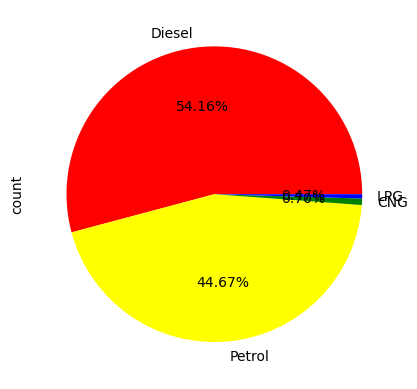

In [32]:
carsales.fuel.value_counts().plot(kind="pie",autopct="%.2f%%",
                                 colors=["red","yellow","green","blue"])

<Axes: ylabel='count'>

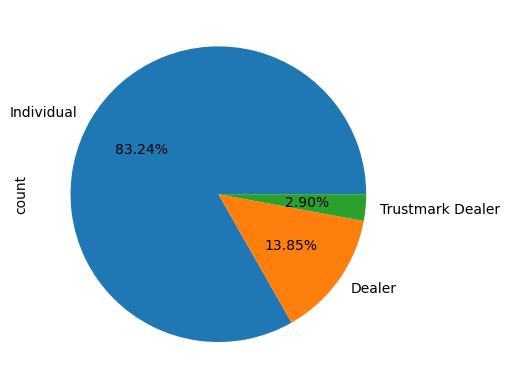

In [33]:
carsales.seller_type.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

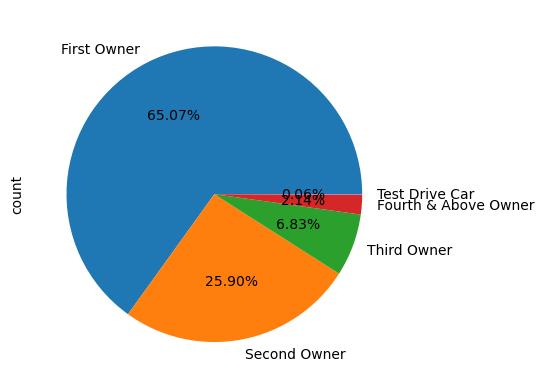

In [34]:
carsales.owner.value_counts().plot(kind="pie",autopct="%.2f%%")

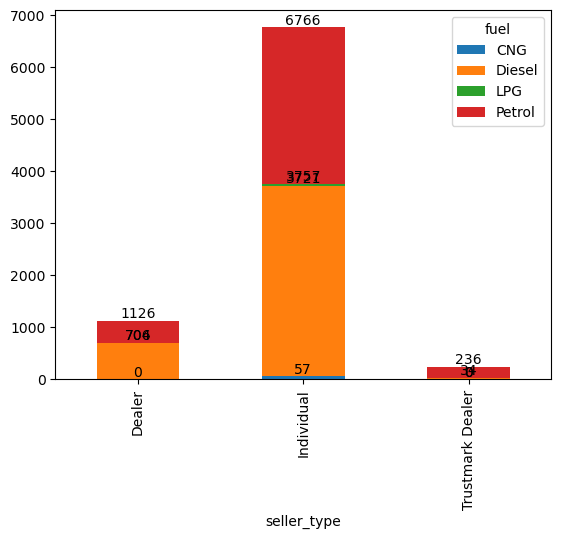

In [35]:
ax=pd.crosstab(carsales.seller_type,carsales.fuel).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

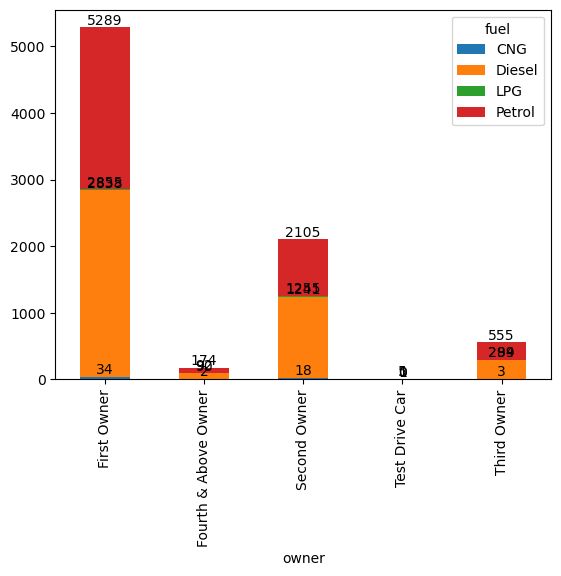

In [36]:
ax=pd.crosstab(carsales.owner,carsales.fuel).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

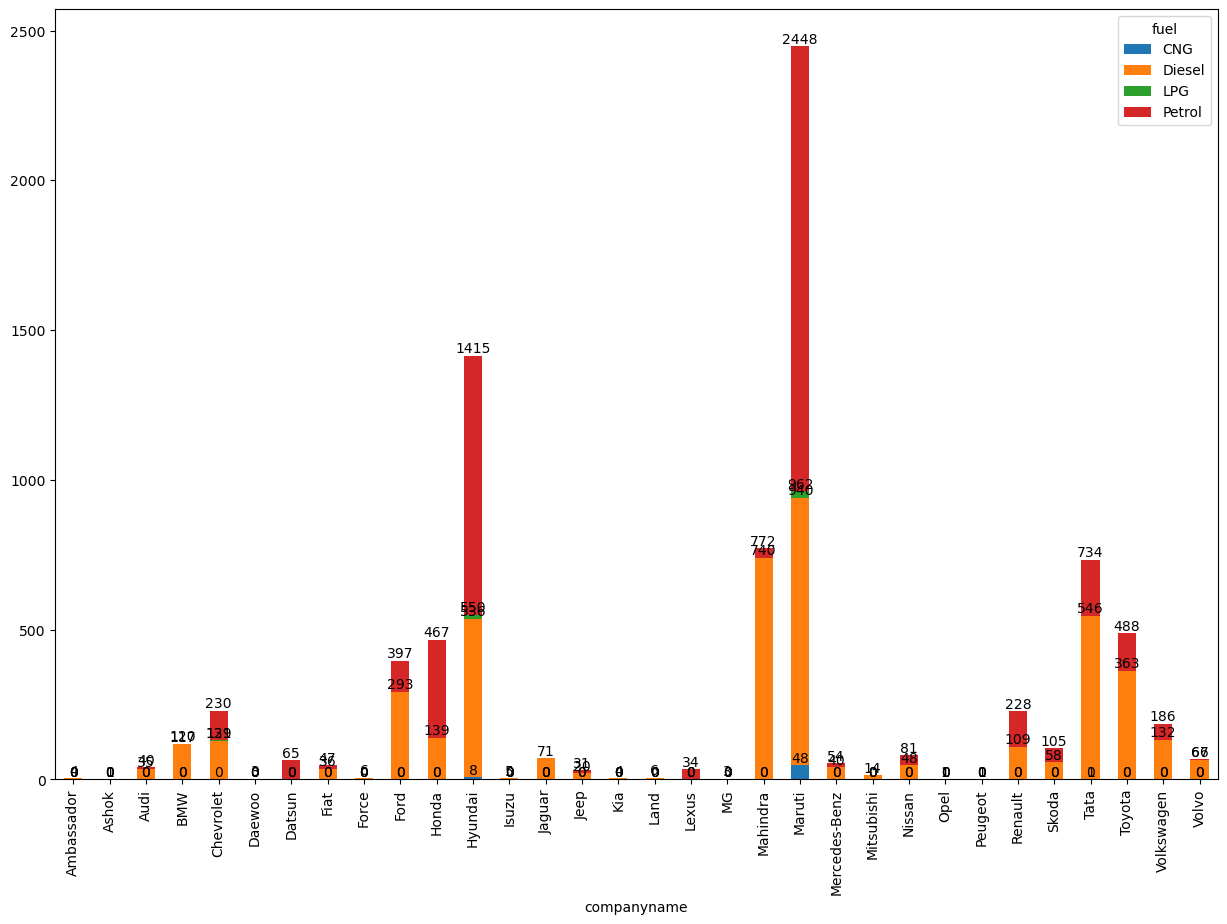

In [37]:
ax=pd.crosstab(carsales.companyname,carsales.fuel).plot(kind="bar",
                                                        stacked=True,figsize=(15,10))
for i in ax.containers:
    ax.bar_label(i)

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

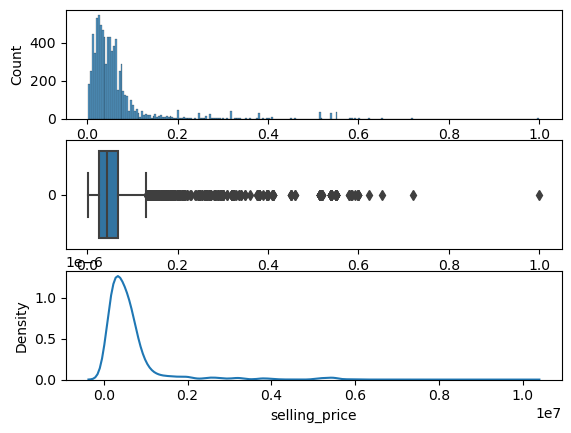

In [38]:
fig,ax=plt.subplots(3,1)
sns.histplot(carsales.selling_price,ax=ax[0])
sns.boxplot(carsales.selling_price,ax=ax[1],orient="h")
sns.kdeplot(carsales.selling_price,ax=ax[2])
plt.show()

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

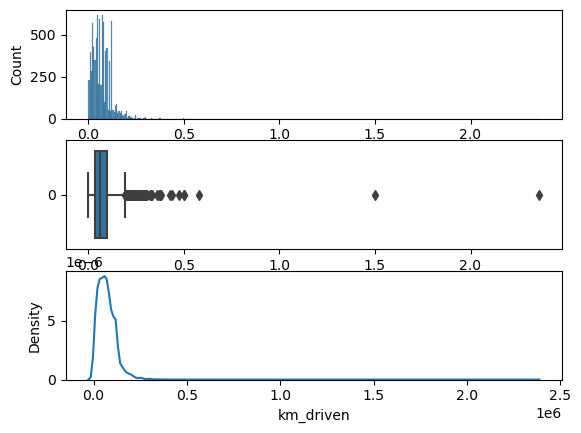

In [39]:
fig,ax=plt.subplots(3,1)
sns.histplot(carsales.km_driven,ax=ax[0])
sns.boxplot(carsales.km_driven,ax=ax[1],orient="h")
sns.kdeplot(carsales.km_driven,ax=ax[2])
plt.show()

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

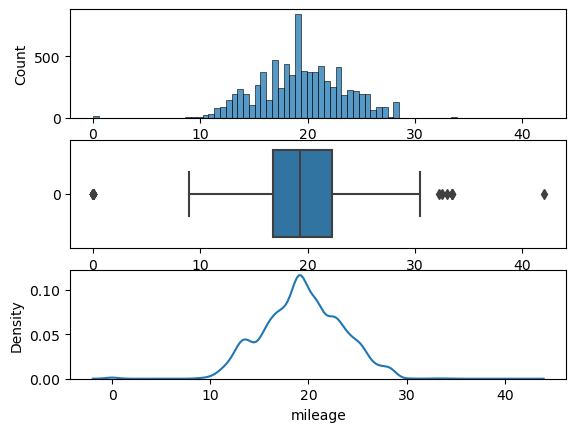

In [40]:
fig,ax=plt.subplots(3,1)
sns.histplot(carsales.mileage,ax=ax[0])
sns.boxplot(carsales.mileage,ax=ax[1],orient="h")
sns.kdeplot(carsales.mileage,ax=ax[2])
plt.show()

In [41]:
# Hypothesis Testing - Comparision of Means/Averages of 2 or more than 3 levels/groups/classes
# Fundamental Assumption - Means/Averages must be different

# Variable 1 Numerical and Variable 2 categorical with exactly 2 levels/groups/classes-
# 2 Sample Independent T test

# # Variable 1 Numerical and Variable 2 categorical with morethan 2 levels/groups/classes-
# Anova Single Factor

# Variable 1 Categorical and Variable 2 categorical - Chi Square Test of Independence

# Variable 1 Numeric and Before and Variable 2 Numeric and After - Paired Sample T test

# Process of Conducting Hypothesis Test
# 1) groupby() - mean and variance
# 2) Frame Null and Alternate Hypothesis
# 3) Split Data into as many levels
# 4) Conduct Test and interpret based on p-value

# p-value interpretation - 2 tail test (rejection on Both Sides)
# p-value less than 0.05, Reject Null
# p-value greater than 0.05, Fail to Reject (Accept) Null
# 0.05 means 5% Alpha(probable error rate) and 95% Confidence Level

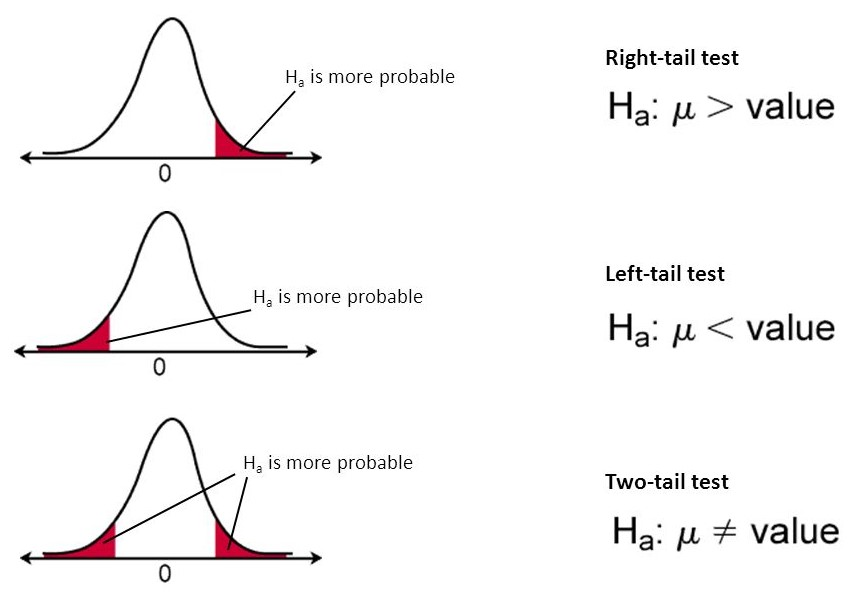

In [42]:
# Test Null Average selling_price of different transmission is equal
np.round(carsales.selling_price.groupby(carsales.transmission).mean(),2)
# Since exactly 2 levels/groups/classes - 2 Sample Independent T Test

transmission
Automatic    1870827.60
Manual        455425.86
Name: selling_price, dtype: float64

In [43]:
np.round(carsales.selling_price.groupby(carsales.transmission).var(),2)

transmission
Automatic    2.691349e+12
Manual       8.872370e+10
Name: selling_price, dtype: float64

In [44]:
# Frame Null and Alternate Hypothesis
# Null - There is no Significant difference in Average selling_price of auto & manual cars
# H0 - meanof auto = mean of manual

# Alt - There is Significant difference in Average selling_price of auto & manual cars
# Ha - meanof auto != mean of manual

In [45]:
# Split Data into auto and manual
auto=carsales[carsales.transmission=="Automatic"]
manual=carsales[carsales.transmission=="Manual"]

In [46]:
from scipy.stats import ttest_ind

In [47]:
ttest_ind(auto.selling_price,manual.selling_price,equal_var=False)
# Since pvalue=8.531946079710315e-129 is less than 0.05, Reject Null
# Difference in Means is Statistically Significant

TtestResult(statistic=27.888813193478946, pvalue=8.531946079710315e-129, df=1059.2814874514092)

In [48]:
# Test Null Average km_driven for auto and manual cars equal
# groupby() - mean & var, Frame Null & Alt, Conduct test & interpret
carsales.km_driven.groupby(carsales.transmission).mean()

transmission
Automatic    40276.086667
Manual       74202.188895
Name: km_driven, dtype: float64

In [49]:
carsales.km_driven.groupby(carsales.transmission).var()

transmission
Automatic    1.250228e+09
Manual       3.338416e+09
Name: km_driven, dtype: float64

In [50]:
# Frame Null and Alternate Hypothesis
# Null - There is no Significant difference in Average km_driven of auto & manual cars
# Alt - There is Significant difference in Average km_driven of auto & manual cars

In [51]:
ttest_ind(auto.km_driven,manual.km_driven,equal_var=False)
# Since pvalue=2.851791533885484e-131 is less than 0.05, Reject Null

TtestResult(statistic=-26.31311123939943, pvalue=2.851791533885484e-131, df=1998.1925323759576)

In [52]:
# Test Null Average mileage of auto and manual cars equal

In [53]:
carsales.mileage.groupby(carsales.transmission).mean()

transmission
Automatic    17.579638
Manual       19.687906
Name: mileage, dtype: float64

In [54]:
carsales.mileage.groupby(carsales.transmission).var()

transmission
Automatic    15.773254
Manual       15.295890
Name: mileage, dtype: float64

In [55]:
# Frame Null and Alternate Hypothesis
# Null - There is no Significant difference in Average mileage of auto & manual cars
# Alt - There is Significant difference in Average mileage of auto & manual cars

In [56]:
ttest_ind(auto.mileage,manual.mileage,equal_var=False)
# Since pvalue=1.924423779471943e-53 is less than 0.05, Reject Null

TtestResult(statistic=-16.08325308774936, pvalue=1.924423779471943e-53, df=1368.3244399399287)

In [57]:
# Test Null Average selling_price for different fuel is equal
carsales.selling_price.groupby(carsales.fuel).mean()
# More than 2 levels/groups/classes - Anova Single Factor

fuel
CNG       301017.491228
Diesel    791452.921627
LPG       200421.052632
Petrol    462441.061691
Name: selling_price, dtype: float64

In [58]:
# Frame Null & Alternate
# Null - There is no Significant difference in Average selling_price of different fuel cars
# Alt - There is Significant difference in Average selling_price of different fuel cars

In [59]:
# Split Data
cng=carsales[carsales.fuel=="CNG"]
diesel=carsales[carsales.fuel=="Diesel"]
lpg=carsales[carsales.fuel=="LPG"]
petrol=carsales[carsales.fuel=="Petrol"]

In [60]:
from scipy.stats import f_oneway

In [61]:
f_oneway(cng.selling_price,diesel.selling_price,lpg.selling_price,petrol.selling_price)
# Since pvalue=7.768067697277526e-78 is less than 0.05, Reject Null

F_onewayResult(statistic=122.88062883888716, pvalue=7.768067697277526e-78)

In [62]:
# Test Null Avearge mileage of different fuel cars equal
carsales.mileage.groupby(carsales.fuel).mean()

fuel
CNG       23.824211
Diesel    19.634607
LPG       18.634211
Petrol    19.088956
Name: mileage, dtype: float64

In [63]:
# Frame Null & Alternate
# Null - There is no Significant difference in Average mileage of different fuel cars
# Alt - There is Significant difference in Average mileage of different fuel cars

In [64]:
f_oneway(cng.mileage,diesel.mileage,lpg.mileage,petrol.mileage)
# Since pvalue=1.218592729218157e-23 is less than 0.05, Reject Null

F_onewayResult(statistic=36.842275392000154, pvalue=1.218592729218157e-23)

In [65]:
# Both Variables Categarical - Chi Square Test of Independence
# Input of Chisquare Test is Cross Tabulation. Cross Tabulation is frequency table of
# 2 Non Numeric Categorical Variables.

# Test Null No Association between fuel and transmission

pd.crosstab(carsales.transmission,carsales.fuel)

fuel,CNG,Diesel,LPG,Petrol
transmission,,,,
Automatic,0,534,0,516
Manual,57,3868,38,3115


In [66]:
# Null - There is no Association between both variables
# Alt - There is Association between both variables

In [67]:
from scipy.stats import chi2_contingency

In [68]:
chi2_contingency(pd.crosstab(carsales.transmission,carsales.fuel))
# Since pvalue=6.801498516561924e-05 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=21.912764347384904, pvalue=6.801498516561924e-05, dof=3, expected_freq=array([[   7.36343504,  568.66387795,    4.90895669,  469.06373031],
       [  49.63656496, 3833.33612205,   33.09104331, 3161.93626969]]))

In [69]:
# Test Null No Association between fuel and seller_type
pd.crosstab(carsales.fuel,carsales.seller_type)

seller_type,Dealer,Individual,Trustmark Dealer
fuel,,,
CNG,0,57,0
Diesel,704,3664,34
LPG,2,36,0
Petrol,420,3009,202


In [70]:
# Null - There is no Association between both variables
# Alt - There is Association between both variables

In [71]:
chi2_contingency(pd.crosstab(carsales.fuel,carsales.seller_type))
# Since pvalue=1.2641980292155646e-40 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=200.82868982394092, pvalue=1.2641980292155646e-40, dof=6, expected_freq=array([[7.89640748e+00, 4.74485728e+01, 1.65501969e+00],
       [6.09824311e+02, 3.66436171e+03, 1.27813976e+02],
       [5.26427165e+00, 3.16323819e+01, 1.10334646e+00],
       [5.03015010e+02, 3.02255733e+03, 1.05427657e+02]]))

In [72]:
# T Test -Students T Distribution
# Anova - F Distribution
# ChiSquare - Chi Distribution

In [73]:
carsales.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'companyname',
       'torq', 'age'],
      dtype='object')

In [74]:
carsales=pd.get_dummies(carsales,columns=['fuel', 'seller_type', 'transmission','owner',
                                         'seats', 'companyname'])

In [75]:
pd.set_option("display.max_columns",62)
carsales.head()

,selling_price,km_driven,mileage,engine,max_power,torq,age,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_2.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0,companyname_Ambassador,companyname_Ashok,companyname_Audi,companyname_BMW,companyname_Chevrolet,companyname_Daewoo,companyname_Datsun,companyname_Fiat,companyname_Force,companyname_Ford,companyname_Honda,companyname_Hyundai,companyname_Isuzu,companyname_Jaguar,companyname_Jeep,companyname_Kia,companyname_Land,companyname_Lexus,companyname_MG,companyname_Mahindra,companyname_Maruti,companyname_Mercedes-Benz,companyname_Mitsubishi,companyname_Nissan,companyname_Opel,companyname_Peugeot,companyname_Renault,companyname_Skoda,companyname_Tata,companyname_Toyota,companyname_Volkswagen,companyname_Volvo
0,450000,145500,23.40,1248.0,74.00,2000.0,8,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,370000,120000,21.14,1498.0,103.52,2500.0,8,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,158000,140000,17.70,1497.0,78.00,3000.0,16,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,225000,127000,23.00,1396.0,90.00,2750.0,12,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,130000,120000,16.10,1298.0,88.20,3000.0,15,False,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [76]:
# distribution of dependent variable(y) decides whether to use Regression or Classification
# Regression Algorithms - Dependent Variable (y) is numerical, continuos, closer to
# normal distribution(bell curve), with minimum outliers, and no missing values.

# Classification Algorithsm - Dependent Variable(y) is non numeric either binary(yes/no) or
# multinomial (more than 2 levels/classes/gorups)

# Multiple Linear Regression explains linear relationship between dependent variable(y) and
# multiple independent variables(X's). Multiple Linear Regression is an equation

# y = B0+B1X1+B2X2+B3X3+B4X4 + ........... +BnXn+Et
# y - Dependent Variable or Predicted Variable
# Bo - Intercept or Constant (point at which straight line touched y axis)
# B1,B2,B3,B4,..Bn - Coefficients
# X1,X2,X3,X4,,,,Xn - Independent Variables or Predictors
# Et - Error term or Residual=ActualValue - PredictedValue

# Assumptions - MLR is parametric Algorithm(many assumptions) - Pre Model
# 1) Dependent Variable y must be numerical,continuous, closer to normal distribution with
# minimum outliers and no missing values
# 2) Independent Variabels(X's) can be both numerical and nonnumeric categorical
# 3) No Multicollinearity - Multicollinearity is very strong correlation(>0.90) among
# variables. If multicollinearity is found do not include both variables choose one among
# them else overfitting problem will occur.
# Variance Inflation Factor (VIF) - VIF greater than 5 indiactes multicollinearity
# 4) Exogentity -Dependent variable is dependent on Independent variables but not vice versa
# y is dependent on X's but X's do not depend on y
# 5 ) Sample Size required is minimum 20 observations per variable
# 6) There must be a logical linear relationship between dependent variable and independent
# variables

# Post Model Assumptions
# 7) Residuals must be normally distributed. Check using Q-Q plot
# 8) Residuals must be homosceadstic in nature


# Interpretation of Output (Python Only)
# R Square must be between 0.60 - 0.95. R SQuare explains amount of variance occuring in
# dependent variable caused by independent variables or model.
# less than 0.60 - Underfitting
# greater than 0.95 - Overfitting

# Intercept + Coefficients for creating predictive equation

# Statistical Interpretation of Output
# 1) Adjusted R Square must be between 0.60 - 0.95. Adj R Square is sensitive to independent
# variable significance, if independent variable is significant it will increase and if
# variable is insignificant it will decrease.

# 2) model p-value(lies below Adjusted R SQuare) or Significance F in MS Excel must be
# less than 0.05. Reject Null
# Null - Coefficients(B's) are equal to Zero
# Alt - Coefficients(B's) are not equal to Zero

# 3) Independent Variables(X's) p-value must be less than 0.05. Reject Null
# Null - Independent Variable is Insignificant
# Alt - Independent Variable is Significant

In [77]:
carsales.columns

Index(['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torq',
       'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_2.0', 'seats_4.0',
       'seats_5.0', 'seats_6.0', 'seats_7.0', 'seats_8.0', 'seats_9.0',
       'seats_10.0', 'seats_14.0', 'companyname_Ambassador',
       'companyname_Ashok', 'companyname_Audi', 'companyname_BMW',
       'companyname_Chevrolet', 'companyname_Daewoo', 'companyname_Datsun',
       'companyname_Fiat', 'companyname_Force', 'companyname_Ford',
       'companyname_Honda', 'companyname_Hyundai', 'companyname_Isuzu',
       'companyname_Jaguar', 'companyname_Jeep', 'companyname_Kia',
       'companyname_Land', 'companyname_Lexus', 'companyname_

In [78]:
# Check for Multicollinearity
carsales[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torq',
       'age']].corr() # No Multicollinearity

,selling_price,km_driven,mileage,engine,max_power,torq,age
selling_price,1.000000,-0.225534,-0.125040,0.458345,0.747935,-0.026574,-0.414092
km_driven,-0.225534,1.000000,-0.171746,0.198911,-0.040599,-0.225604,0.418006
mileage,-0.125040,-0.171746,1.000000,-0.574128,-0.372897,-0.173322,-0.311657
engine,0.458345,0.198911,-0.574128,1.000000,0.703612,-0.201131,-0.035851
max_power,0.747935,-0.040599,-0.372897,0.703612,1.000000,-0.001697,-0.224704
torq,-0.026574,-0.225604,-0.173322,-0.201131,-0.001697,1.000000,-0.099360
age,-0.414092,0.418006,-0.311657,-0.035851,-0.224704,-0.099360,1.000000


<Axes: >

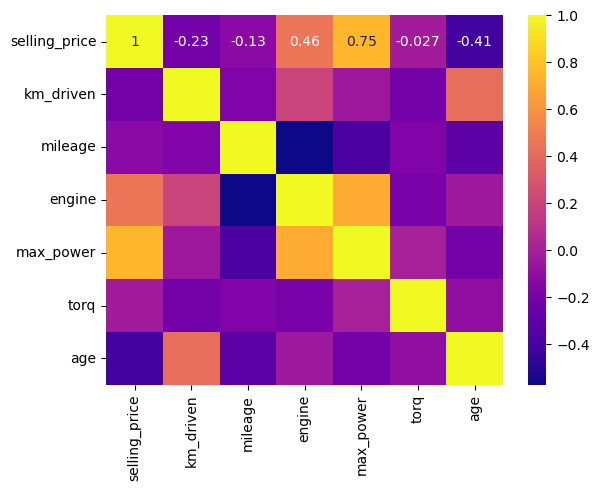

In [79]:
sns.heatmap(carsales[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torq',
       'age']].corr(),annot=True,cmap="plasma")

In [80]:
# Split Data into Dependent Variable(y) and Independent Variables(X)
y=carsales.selling_price
X=carsales.drop("selling_price",axis=1)

In [81]:
from sklearn.linear_model import LinearRegression

In [85]:
regmodel=LinearRegression().fit(X,y)

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

In [86]:
regmodel.score(X,y)

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/rajeshprabhakarkaila/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

0.8551297833952861

In [ ]:
# R Square -0.8551297833952861
# 85.51% variance in selling_price(y) is explained by this model

In [87]:
regmodel.intercept_

1501075.6950207683

In [88]:
print(list(zip(X.columns,regmodel.coef_)))

[('km_driven', -0.612370614858416), ('mileage', -284.97960733488713), ('engine', 50.37211758868989), ('max_power', 6748.356477032656), ('torq', -40.06732951720187), ('age', -44504.599900540634), ('fuel_CNG', -82163.53291896987), ('fuel_Diesel', -1380.7230757236248), ('fuel_LPG', 107495.05474270682), ('fuel_Petrol', -23950.79874813487), ('seller_type_Dealer', 37341.31028642005), ('seller_type_Individual', -21425.74676488631), ('seller_type_Trustmark Dealer', -15915.563521576929), ('transmission_Automatic', 49101.75182792387), ('transmission_Manual', -49101.75182792562), ('owner_First Owner', -470015.69264798623), ('owner_Fourth & Above Owner', -491880.39831359766), ('owner_Second Owner', -526118.4707575743), ('owner_Test Drive Car', 1991199.289360321), ('owner_Third Owner', -503184.7276410362), ('seats_2.0', -80631.97805531078), ('seats_4.0', 293416.6437911773), ('seats_5.0', -42917.25013008987), ('seats_6.0', -133521.55316449585), ('seats_7.0', -949.8731528341232), ('seats_8.0', -61756

In [100]:
import warnings
warnings.filterwarnings("ignore")

In [101]:
regpredict=regmodel.predict(X) # predicted selling_price

In [102]:
# Residual = Actual selling_price - Predicted selling_price
regresid=y-regpredict

In [103]:
# Root Mean Square Error (RMSE) - Diagnostic for all Regression Algorithms
np.sqrt(np.mean(regresid**2)) # RMSE - 306855.8435

306855.8435558256

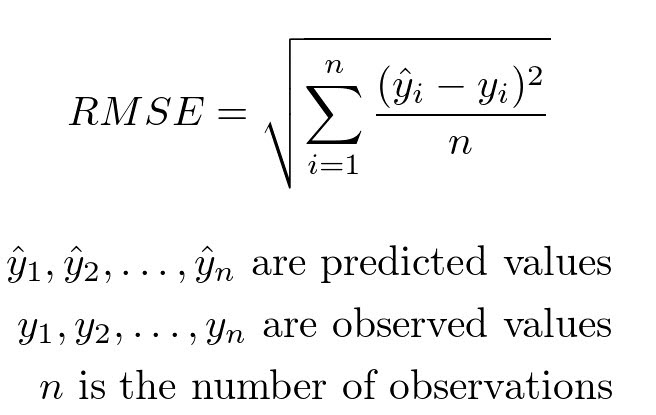

In [104]:
print("Skewness",y.skew())
print("Kurtosis",y.kurt())

Skewness 4.193533440675855
Kurtosis 21.081289012186755


In [105]:
# Dependent Variable - has Skewness and Kurtosis - Not Closer to Normal Distribution
# Positive Skewness - Logarthmic Transformation or Square Root Transformation
# Negative Skewness - Exponential Transformation or Power Transformation

<Axes: ylabel='Density'>

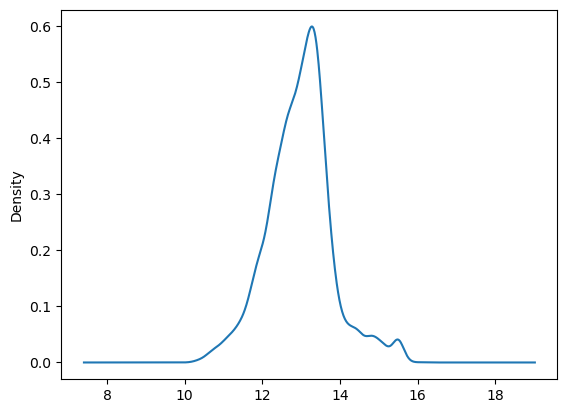

In [106]:
np.log(y).plot(kind="density")

In [116]:
# Log Linear Model
regmodel2=LinearRegression().fit(X,np.log(y))

In [117]:
regmodel2.score(X,np.log(y))

0.9096944948105495

In [118]:
regmodel2_predict=regmodel2.predict(X)

In [120]:
regmodel2_predict=np.exp(regmodel2_predict)

In [114]:
regmodel2_resid=y-regmodel2_predict

In [115]:
np.sqrt(np.mean(regmodel2_resid**2))

207601.67122530454

In [123]:
np.round(carsales.selling_price.describe(),2)

count        8128.00
mean       638271.81
std        806253.40
min         29999.00
25%        254999.00
50%        450000.00
75%        675000.00
max      10000000.00
Name: selling_price, dtype: float64

In [124]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
treemodel=DecisionTreeRegressor(max_depth=8).fit(X,y)

In [132]:
treemodel.score(X,y)

0.9789097975640494

In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
cross_val_score(treemodel,X,y)

array([0.93902324, 0.93959844, 0.96522707, 0.91664747, 0.90058289])

In [135]:
np.mean([0.93902324, 0.93959844, 0.96522707, 0.91664747, 0.90058289])

0.9322158220000001

In [136]:
treepredict=treemodel.predict(X)

In [137]:
treeresid=y-treepredict

In [138]:
np.sqrt(np.mean(treeresid**2))

117080.6749935128

In [143]:
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
   
    def recurse(node, path, paths):
       
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
           
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
   
    rules = []
    for path in paths:
        rule = "if "
       
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
       
    return rules

In [147]:
rules = get_rules(treemodel,X.columns,y)
for r in rules:
    print(r)

if (max_power <= 172.915) and (max_power <= 147.97) and (age > 8.5) and (max_power <= 98.145) and (age > 11.5) and (age <= 14.5) and (max_power > 62.55) and (companyname_BMW <= 0.5) then class: 450000 (proba: 100.0%) | based on 495 samples
if (max_power <= 172.915) and (max_power <= 147.97) and (age <= 8.5) and (max_power <= 87.0) and (max_power > 69.505) and (age <= 5.5) and (engine <= 1223.5) and (torq > 3675.0) then class: 450000 (proba: 100.0%) | based on 460 samples
if (max_power <= 172.915) and (max_power <= 147.97) and (age > 8.5) and (max_power <= 98.145) and (age <= 11.5) and (max_power <= 73.4) and (engine <= 2223.5) and (engine > 996.5) then class: 450000 (proba: 100.0%) | based on 426 samples
if (max_power <= 172.915) and (max_power <= 147.97) and (age <= 8.5) and (max_power > 87.0) and (max_power <= 117.45) and (age > 5.5) and (companyname_Toyota <= 0.5) and (age > 6.5) then class: 450000 (proba: 100.0%) | based on 360 samples
if (max_power <= 172.915) and (max_power <= 14

In [149]:
pd.DataFrame(X.columns,treemodel.feature_importances_,).sort_index(ascending=False)

,0
0.743648,max_power
0.195503,age
0.015930,engine
0.015136,km_driven
0.013924,mileage
0.005071,seats_4.0
0.003668,torq
0.002198,companyname_Toyota
0.001277,fuel_Diesel
0.000757,companyname_Tata


In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
RF=RandomForestRegressor(n_estimators=1000).fit(X,y)

In [152]:
RF.score(X,y)

0.9958679959546766

In [153]:
RFpredict=RF.predict(X)

In [154]:
RFresid=y-RFpredict

In [155]:
np.sqrt(np.mean(RFresid**2))

51823.31764794151

In [158]:
pd.DataFrame(np.round(RF.feature_importances_,2),
             X.columns).sort_values(by=0,ascending=False)

,0
max_power,0.72
age,0.20
km_driven,0.02
engine,0.01
torq,0.01
mileage,0.01
companyname_Hyundai,0.00
companyname_Kia,0.00
companyname_Jeep,0.00
companyname_Jaguar,0.00
